<a href="https://colab.research.google.com/github/yagipong/classifcation-predictions/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing pipeline libraries
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

#importing modeling pipelines
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(display = 'diagram')

#regression metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
classification_report, ConfusionMatrixDisplay

In [308]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
#loading the dataset
path = '/content/drive/MyDrive/CD_DS/2_Machine_Learning/Week_3/Assignments/Core/adult.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [310]:
#checking data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [311]:
#checking duplicates
df.duplicated().sum()

52

In [312]:
#dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [313]:
#checking categories
for col in df.select_dtypes('object'):
  print(df[col].value_counts())

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         560

In [314]:
#removing the '?' that is used to represent missing data
df = df.replace('?', np.nan)

Missing values will be addressed using a SimpleImputer as part of a preprocessor pipeline.

##Univariate visuals

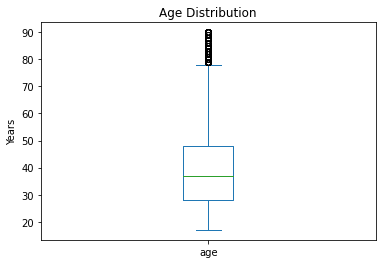

In [315]:
#Age boxplot
df['age'].plot(kind = 'box')
plt.title('Age Distribution')
plt.ylabel('Years');

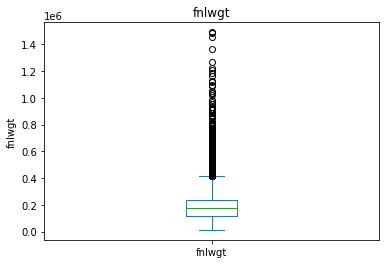

In [316]:
#fnlwgt boxplot
df['fnlwgt'].plot(kind = 'box')
plt.title('fnlwgt')
plt.ylabel('fnlwgt');

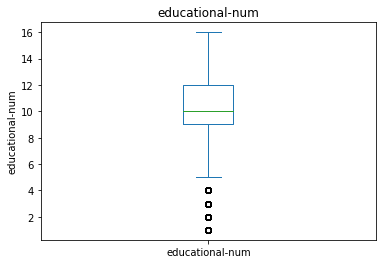

In [317]:
#educational-num boxplot
df['educational-num'].plot(kind = 'box')
plt.title('educational-num')
plt.ylabel('educational-num');

There are a few outliers in educational-num.

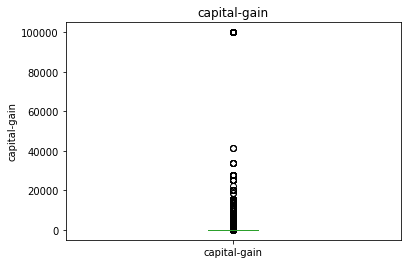

In [318]:
#capital-gain boxplot
df['capital-gain'].plot(kind = 'box')
plt.title('capital-gain')
plt.ylabel('capital-gain');

There is one major outlier in capital gains (99999)

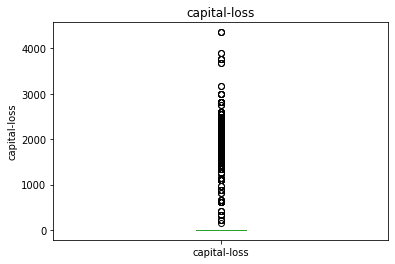

In [319]:
#capital-loss boxplot
df['capital-loss'].plot(kind = 'box')
plt.title('capital-loss')
plt.ylabel('capital-loss');

Capital loss is interesting in that there isn't a neat boxplot for the info - most capital losses could be considered outliers.

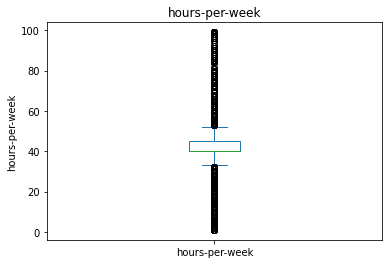

In [320]:
#hours-per-week boxplot
df['hours-per-week'].plot(kind = 'box')
plt.title('hours-per-week')
plt.ylabel('hours-per-week');

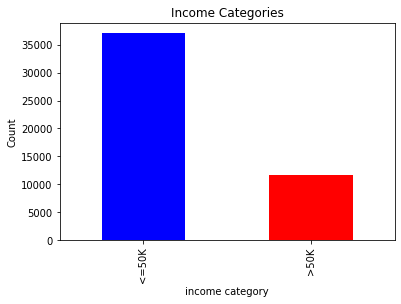

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [321]:
income = df['income'].value_counts()
income.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Income Categories')
plt.xlabel('income category')
plt.ylabel('Count');
plt.show()

income

The bar graphs indicate a series of imbalances across the data, from the target column to several features such as working class categories, race, gender, and native country.

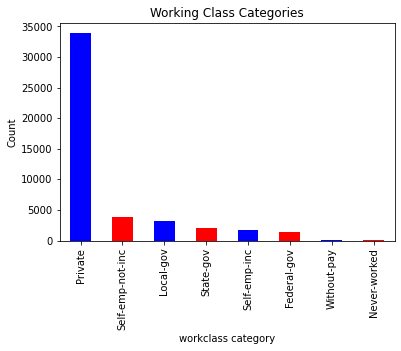

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [322]:
workclass = df['workclass'].value_counts()
workclass.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Working Class Categories')
plt.xlabel('workclass category')
plt.ylabel('Count');
plt.show()

workclass

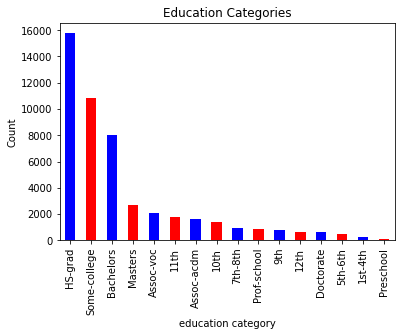

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [323]:
education = df['education'].value_counts()
education.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Education Categories')
plt.xlabel('education category')
plt.ylabel('Count');
plt.show()

education

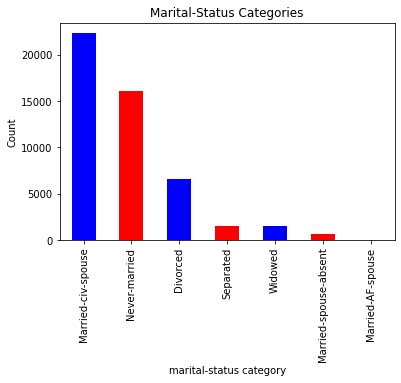

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [324]:
marital_status = df['marital-status'].value_counts()
marital_status.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Marital-Status Categories')
plt.xlabel('marital-status category')
plt.ylabel('Count');
plt.show()

marital_status

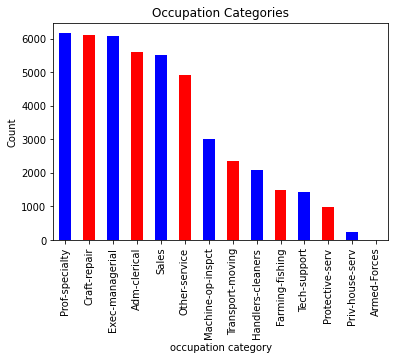

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [325]:
occupation = df['occupation'].value_counts()
occupation.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Occupation Categories')
plt.xlabel('occupation category')
plt.ylabel('Count');
plt.show()

occupation

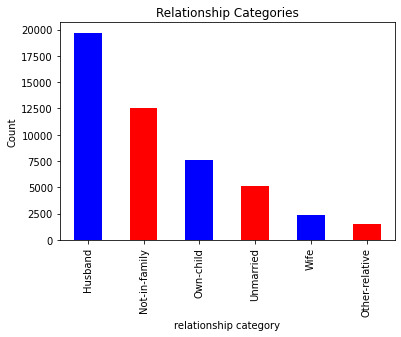

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [326]:
relationship = df['relationship'].value_counts()
relationship.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Relationship Categories')
plt.xlabel('relationship category')
plt.ylabel('Count');
plt.show()

relationship

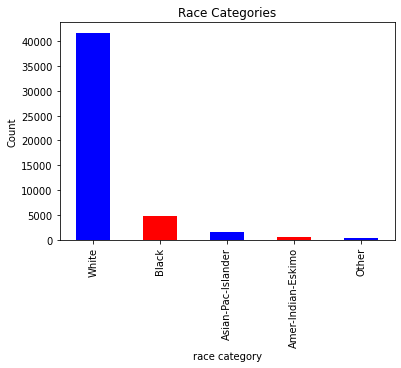

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [327]:
race = df['race'].value_counts()
race.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Race Categories')
plt.xlabel('race category')
plt.ylabel('Count');
plt.show()

race

The data heavily skews white.

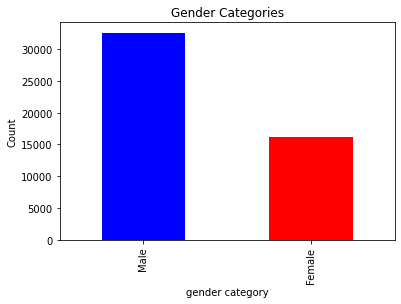

Male      32614
Female    16176
Name: gender, dtype: int64

In [328]:
gender = df['gender'].value_counts()
gender.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Gender Categories')
plt.xlabel('gender category')
plt.ylabel('Count');
plt.show()

gender

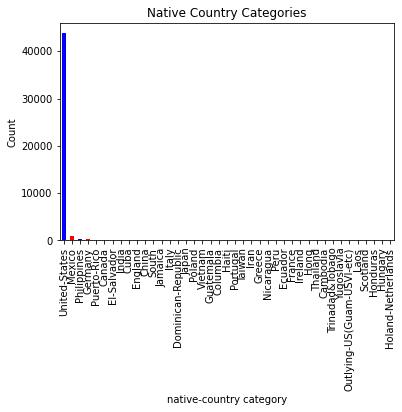

United-States                 43792
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [329]:
native_country = df['native-country'].value_counts()
native_country.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Native Country Categories')
plt.xlabel('native-country category')
plt.ylabel('Count');
plt.show()

native_country

Native-country is so skewed to the US that I might consider removing the column. I'm skeptical that the column will add valuable information to the data analysis.

#Multivariate Exploratory Visualizations

##Correlation Heatmap

In [330]:
#correlation heatmap
corr = df.corr()

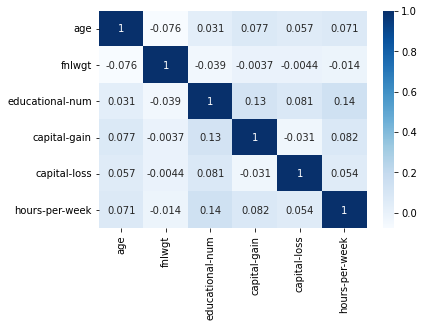

In [331]:
sns.heatmap(corr, cmap = "Blues", annot = True);

The most notable insight from the correlation heatmap is that none of the variables seem to be strongly correlated. The most strongly correlated variables in the dataset are hours per week and educational-num, but that correlation is only 0.14. The key takeaway from the correlation map, therefore, is that the variables are pretty independent of each other.

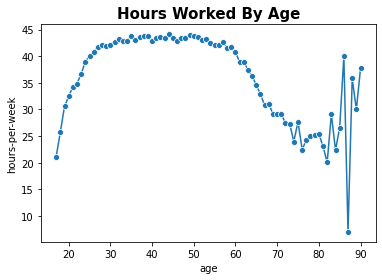

In [332]:
sns.lineplot(data = df, x = 'age', y = 'hours-per-week', ci = None, marker = 'o')
plt.title('Hours Worked By Age', fontsize = 15, fontweight = 'bold');

The multivariate line graph demonstrates that people tend to hit their peak working hours between ages 30 and 60. After age 80, however, there actually seems to be a resurgance in hours worked.

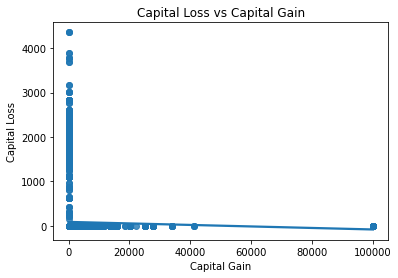

In [333]:
ax = sns.regplot(data = df, x = 'capital-gain', y = 'capital-loss')
ax.set_title('Capital Loss vs Capital Gain')
ax.set_xlabel('Capital Gain')
ax.set_ylabel('Capital Loss');

The important trend to notice with this plot of capital gains versus capital losses is that the gains and losses are not clustered at zero. Most people either gained a lot of money or lost a lot of money.

#Visualizations from which I will launch further analysis

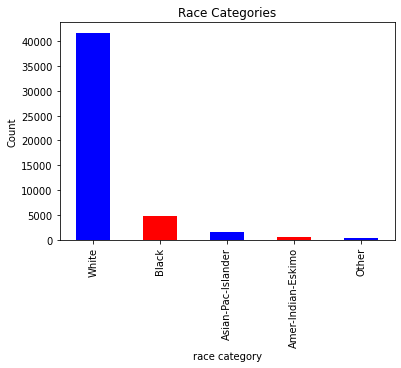

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [334]:
race = df['race'].value_counts()
race.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Race Categories')
plt.xlabel('race category')
plt.ylabel('Count');
plt.show()

race

Race provides an interesting story to explore further because the dataset fails to adequately represent the income levels of different races. It will be interesting to dig further into the data to see how the racial bias in the data impacts the predictive power of the data

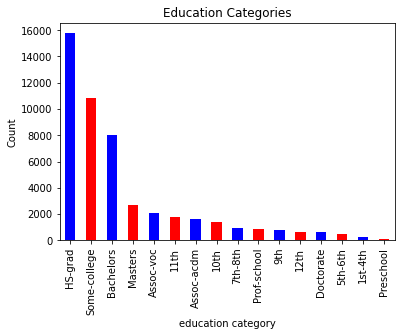

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [335]:
education = df['education'].value_counts()
education.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Education Categories')
plt.xlabel('education category')
plt.ylabel('Count');
plt.show()

education

Education levels will be an important metric to evaluate further. Conventional wisdom states that people with a higher education level should have higher incomes. Our predictive analysis will seek to prove or disprove this assumption.

## Modeling: Logistic Regression, KNN, PCA

In [336]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        45995 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       45985 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   47934 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 7.0+ MB


In [338]:
#ordinal encoding the target column
df['income'].replace({'<=50K':0, '>50K':1}, inplace = True)

In [339]:
X = df.drop(columns = ['income'])
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [340]:
#building out the logistic regression pipeline
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [341]:
freq_imputer = SimpleImputer(strategy = 'most_frequent')
median_imputer = SimpleImputer(strategy = 'median')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [342]:
numeric_pipe = make_pipeline(median_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

In [343]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)

In [344]:
logreg = LogisticRegression(C = 0.1)
logreg_pipe = make_pipeline(preprocessor, logreg)

In [345]:
#fitting the logistic regression model on the training and testing data
%%time
logreg_pipe.fit(X_train, y_train)
print(f'The score of the model on the training data is {logreg_pipe.score(X_train, y_train)}')
print(f'The score of the model on the testing data is {logreg_pipe.score(X_test, y_test)}')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The score of the model on the training data is 0.8515249234805422
The score of the model on the testing data is 0.8510411542875881
CPU times: user 3.19 s, sys: 970 ms, total: 4.16 s
Wall time: 2.37 s


In [346]:
logreg_pipe_pred = logreg_pipe.predict(X_test)
logreg_pipe_pred

array([0, 0, 1, ..., 0, 0, 0])

In [347]:
#Training Score vs Testing Score
print(f'The score of the model on the training data is {logreg_pipe.score(X_train, y_train)}')
print(f'The score of the model on the testing data is {logreg_pipe.score(X_test, y_test)}')

The score of the model on the training data is 0.8515249234805422
The score of the model on the testing data is 0.8510411542875881


In [348]:
#accuracy
logreg_pipe_accuracy = accuracy_score(y_test, logreg_pipe_pred)
print(f'The accuracy of the model on the testing data is {logreg_pipe_accuracy}.')

The accuracy of the model on the testing data is 0.8510411542875881.


In [349]:
#recall
logreg_pipe_recall = recall_score(y_test,logreg_pipe_pred)
print(f'The recall of the model on the testing data is {logreg_pipe_recall}.')

The recall of the model on the testing data is 0.5744027303754267.


In [350]:
#precision
logreg_pipe_precision = precision_score(y_test,logreg_pipe_pred)
print(f'The precision of the model on the testing data is {logreg_pipe_precision}.')

The precision of the model on the testing data is 0.7470039946737683.


In [351]:
#Classification Report for the pipeline
print(classification_report(y_test, logreg_pipe_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      9268
           1       0.75      0.57      0.65      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.84      0.85      0.84     12198



In [352]:
#L1 Regularization
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C = c, max_iter = 1000, solver = 'liblinear', penalty = 'l1')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

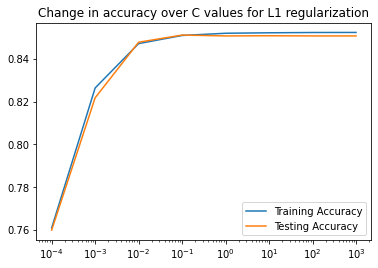

In [353]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L1 regularization')
ax.legend()
ax.set_xscale('log')

In [354]:
{c:score for c, score in zip(c_values, test_scores)}
#demonstrates that the model is optimized at C = 0.1

{0.0001: 0.7597966879816364,
 0.001: 0.8217740613215281,
 0.01: 0.8477619281849483,
 0.1: 0.8511231349401541,
 1: 0.8507132316773242,
 10: 0.8507952123298902,
 100: 0.8507132316773242,
 1000: 0.8507132316773242}

In [355]:
#building out the KNN pipeline
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2531710820>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2531710760>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [356]:
#predictions from the knn pipeline
%%time
predictions = knn_pipe.predict(X_test)
predictions

CPU times: user 16.9 s, sys: 1.62 s, total: 18.5 s
Wall time: 19 s


array([0, 1, 0, ..., 0, 0, 0])

In [357]:
#accuracy
knn_accuracy = accuracy_score(y_test, predictions)
print(f'The accuracy of the model on the testing data is {knn_accuracy}.')

The accuracy of the model on the testing data is 0.8337432365961633.


In [358]:
#recall
knn_recall = recall_score(y_test, predictions)
print(f'The recall of the model on the testing data is {knn_recall}.')

The recall of the model on the testing data is 0.5880546075085324.


In [359]:
#precision
knn_precision = precision_score(y_test, predictions)
print(f'The precision of the model on the testing data is {knn_precision}.')

The precision of the model on the testing data is 0.6772798742138365.


In [360]:
#Classification Report for the pipeline
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9268
           1       0.68      0.59      0.63      2930

    accuracy                           0.83     12198
   macro avg       0.78      0.75      0.76     12198
weighted avg       0.83      0.83      0.83     12198



In [361]:
#instantiating the PCA and building out the PCA pipeline
pca = PCA(n_components= .95)
transformer = make_pipeline(preprocessor, pca)

In [362]:
knn_pca_pipe = make_pipeline(transformer, knn)

In [363]:
test_predictions = knn_pca_pipe.fit(X_test, y_test)

In [364]:
#predictions from the PCA + KNN pipeline
%%time
test_predictions = knn_pca_pipe.predict(X_test)
test_predictions

CPU times: user 4.15 s, sys: 395 ms, total: 4.54 s
Wall time: 3.81 s


array([1, 0, 0, ..., 0, 1, 0])

In [365]:
#PCA + KNN metrics: score
%%time
test_predictions_score = knn_pca_pipe.score(X_test, y_test)
test_predictions_score

CPU times: user 4.21 s, sys: 380 ms, total: 4.59 s
Wall time: 3.85 s


0.8768650598458764

Performing the PCA improved the model's score by 2% and reduced the CPU time. Therefore, the best model to pick for this dataset is the PCA + KNN pipeline. This model would be very helpful in categorizing different groups of people and predicting their income level based on their categorical groupings.